## Example 1: Infiltration of Water into a Single-Layered Soil Profile
M. Vremec, R.A. Collenteur 

From:  
David Rassam, Jirka Šimůnek, Dirk Mallants,and Martinus Th. van Genuchten, \
The HYDRUS-1D Software Package for Simulating the One-Dimensional Movement of Water, Heat, and Multiple Solutes in Variably-Saturated Media \
Tutorial \
Version 1.00, July 2018

This example provides insctructions to create a Pydrus model that involves infiltration of water from a ponded soil surface into a 1-m deep single-layered loam soil. The soil profile is initially unsaturated, having an initial pressure head of -100 cm. The upper boundary and lower boundary are represented with: 
* Upper BC: Constant Pressure Head (pressure head at the soil surface is 1 cm)(corresponding to the ponding depth).
* Bottom BC: Free Drainage boundary condition (groundwater table is at an unspecified point deep in the profile (e.g., more than 10 m). 

### Import the Pydrus package

In [1]:
import os
import pandas as pd
import pydrus as ps
%matplotlib inline

### Create the basic model

In [2]:
# Folder for Hydrus files to be stored
ws = "example_1"
# Path to folder containing hydrus.exe 
exe = os.path.join(os.getcwd(),"../../source/hydrus")  
# Description
desc = "Infiltration of Water into a Single-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, 
              mass_units="mmol", time_unit="days", length_unit="cm")

### Add time information

In [3]:
times = ml.add_time_info(tmax=1, print_times=True, nsteps=12,
                         dt=0.001, dtmin=0.00001, dtmax=5)

### Add water flow

In [4]:
ml.add_waterflow(top_bc=0, bot_bc=4, linitw=False,
                 ha=1e-006, hb=10000, maxit=10, tolth=0.001, tolh=1)

### Add materials

In [5]:
m = pd.DataFrame(data=[[0.078, 0.43, 0.036, 1.56, 24.96, 0.5]],
                 columns=["thr", "ths", "Alfa", "n", "Ks", "l"])
ml.add_material(m)

### Add profile information

In [6]:
# Disctretize soil column into n elements
elements = 100

# Depth of the soil column
bottom = -100

# Determine initial Pressure Head
ihead = -100

# Create Profile
profile = ps.create_profile(bot=bottom, dx=abs(elements / bottom), h=ihead)

# Define initial Pressure Head at the surface
profile.iloc[0, 1] = 1

# Add the profile
ml.add_profile(profile)

### Add observation nodes

In [7]:
# Add observation nodes at depth
obs = [-20, -40, -60, -80, -100]
ml.add_observations(obs)

### Add atmosphere boundary conditions

### Add root water uptake

### Write hydrus input files

In [8]:
ml.write_input()

Successfully wrote example_1\SELECTOR.IN
Successfully wrote example_1\PROFILE.DAT


### Run hydrus

In [9]:
rs = ml.simulate()

### Plot results

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196F1932978>,
      dtype=object)

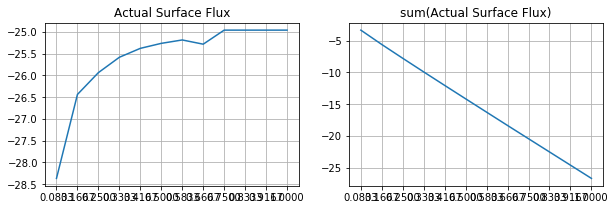

In [10]:
ml.plots.water_flow(data="Actual Surface Flux")